<a href="https://colab.research.google.com/github/lj89/Colab/blob/master/QTW_CS6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [16]:
N= int(0.02*10999999) # too challenging for my computer to read in entire data, so subsample about 2% for this assignment

directory = 'C:/Users/N1110/Desktop/QTW/CS6/'
df = pd.read_csv(directory + 'HIGGS.csv', nrows=N,header=None)  # , header=None
df.head() 

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [17]:
df.shape

# 20%
# Out[11]:
# (2199999, 29)

#when read in entire data (10,999,999, 29)

(219999, 29)

In [18]:
cols=['class label','lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude'
                  , 'missing energy phi', 'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt'
                  , 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag'
                  , 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv'
                  , 'm_bb', 'm_wbb', 'm_wwbb']

df.columns=cols

In [19]:
df.dtypes

class label                 float64
lepton pT                   float64
lepton eta                  float64
lepton phi                  float64
missing energy magnitude    float64
missing energy phi          float64
jet 1 pt                    float64
jet 1 eta                   float64
jet 1 phi                   float64
jet 1 b-tag                 float64
jet 2 pt                    float64
jet 2 eta                   float64
jet 2 phi                   float64
jet 2 b-tag                 float64
jet 3 pt                    float64
jet 3 eta                   float64
jet 3 phi                   float64
jet 3 b-tag                 float64
jet 4 pt                    float64
jet 4 eta                   float64
jet 4 phi                   float64
jet 4 b-tag                 float64
m_jj                        float64
m_jjj                       float64
m_lv                        float64
m_jlv                       float64
m_bb                        float64
m_wbb                       

In [20]:
df.isnull().sum()

class label                 0
lepton pT                   0
lepton eta                  0
lepton phi                  0
missing energy magnitude    0
missing energy phi          0
jet 1 pt                    0
jet 1 eta                   0
jet 1 phi                   0
jet 1 b-tag                 0
jet 2 pt                    0
jet 2 eta                   0
jet 2 phi                   0
jet 2 b-tag                 0
jet 3 pt                    0
jet 3 eta                   0
jet 3 phi                   0
jet 3 b-tag                 0
jet 4 pt                    0
jet 4 eta                   0
jet 4 phi                   0
jet 4 b-tag                 0
m_jj                        0
m_jjj                       0
m_lv                        0
m_jlv                       0
m_bb                        0
m_wbb                       0
m_wwbb                      0
dtype: int64

In [22]:
#save to csv for future use
df.to_csv("./HIGGS2.csv", sep=',',index=False)

In [1]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!! took extremely long time to import the complete data. avoid run the code above on personal computer. run from here.
# acutally still take long to import 2% of the data

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.model_selection import train_test_split
from time import time

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:

import tensorflow as tf;print("tensorflow:",tf.__version__)
from tensorflow.keras import layers

tensorflow: 2.0.0-alpha0


In [3]:
directory = 'C:/Users/N1110/Desktop/QTW/CS6/'
df_HIGGS= pd.read_csv(directory + 'HIGGS2.csv')  # , header=None
df_HIGGS.head() 

,class label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [4]:
df_HIGGS.shape

(219999, 29)

In [5]:
df_HIGGS['class label'].value_counts() #about the same distribution as original data. good

1.0    116163
0.0    103836
Name: class label, dtype: int64

In [6]:

df_HIGGS.isna().sum()

class label                 0
lepton pT                   0
lepton eta                  0
lepton phi                  0
missing energy magnitude    0
missing energy phi          0
jet 1 pt                    0
jet 1 eta                   0
jet 1 phi                   0
jet 1 b-tag                 0
jet 2 pt                    0
jet 2 eta                   0
jet 2 phi                   0
jet 2 b-tag                 0
jet 3 pt                    0
jet 3 eta                   0
jet 3 phi                   0
jet 3 b-tag                 0
jet 4 pt                    0
jet 4 eta                   0
jet 4 phi                   0
jet 4 b-tag                 0
m_jj                        0
m_jjj                       0
m_lv                        0
m_jlv                       0
m_bb                        0
m_wbb                       0
m_wwbb                      0
dtype: int64

In [7]:
features=['lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude'
                  , 'missing energy phi', 'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt'
                  , 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag'
                  , 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv'
                  , 'm_bb', 'm_wbb', 'm_wwbb']

In [8]:
y= np.array(df_HIGGS['class label'])

X =np.array(df_HIGGS[features])

In [9]:
#it's good practice to Scale Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(X)
scaled_train_df = pd.DataFrame(scaled_train, columns=features)

In [10]:

# for i in scaled_train_df:
#     scaled_train_df[i].hist()
#     plt.show()

In [11]:
# cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1776)

In [12]:

print(len(y_test))
print(len(y_train))

44000
175999


In [13]:
# want to test activation = ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], dropout [0.1,0.2, 0.3, 0.5]


In [24]:
from tensorflow.keras.callbacks import TensorBoard
tb = TensorBoard(log_dir=f"logs\\{time()}")


In [29]:
tf.compat.v1.disable_eager_execution() #disable eager execution,since got error AttributeError: Tensor.graph is meaningless when eager execution is enabled.

In [30]:
def tensorflow_keras_model(X_train,y_train,X_test,y_test,Num_layers=1, units=300, activation_func='tanh',learning_rate=2e-5,
                           metrics=['mean_squared_error'],batch_size=1000,epochs=5
                          ,weight_decay=0):   #
    model= tf.keras.Sequential()
    for i in range(Num_layers):
        model.add(layers.Dense(units, activation=activation_func,kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
        
    model.add(layers.Dense(3 ,activation=activation_func))

    #compile the model
    model.compile(tf.keras.optimizers.SGD(lr=learning_rate, momentum=0.9), #optimizer=tf.train.GradientDescentOptimizer(learning_rate),
                  loss = 'sparse_categorical_crossentropy',
                  metrics=metrics)
    # fit the model
    results = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=epochs, batch_size=batch_size, callbacks=[tb]) #
    
    #add AUC curve
    # credit: https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/
    
    y_pred_keras = model.predict(X_test)[:, 1]
    print(model.summary())
    #print(y_pred_keras.shape)
    
    if (Num_layers==1):
        figure_Name = "NN_"+str(units)+"_Unites_"+str(learning_rate)+"_learningRate_"+str(weight_decay)+"_weightDecay"
    else:
        figure_Name = "DN_"+str(Num_layers)+"_layer"+str(units)+"_Unites_"+str(learning_rate)+"_learningRate_"+str(weight_decay)+"_weightDecay"
    
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
    auc_keras = auc(fpr_keras, tpr_keras)
    
    plt.plot(results.history['loss'], label='train')
    plt.plot(results.history['val_loss'], label='test')
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.savefig(figure_Name+"_loss.png")
    plt.show()
    
    
#     Draw ROC 
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#     plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.savefig(figure_Name+"_ROC.png")
    plt.show()

DN- 3  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 3s 18us/sample - loss: 1.1504 - mean_squared_error: 0.4378 - val_loss: 0.7411 - val_mean_squared_error: 0.4965
Epoch 2/5
175999/175999 [==============================] - 2s 12us/sample - loss: 0.7210 - mean_squared_error: 0.5387 - val_loss: 0.7094 - val_mean_squared_error: 0.5714
Epoch 3/5
175999/175999 [==============================] - 2s 12us/sample - loss: 0.7046 - mean_squared_error: 0.5930 - val_loss: 0.7021 - val_mean_squared_error: 0.6116
Epoch 4/5
175999/175999 [==============================] - 3s 17us/sample - loss: 0.6996 - mean_squared_error: 0.6248 - val_loss: 0.6986 - val_mean_squared_error: 0.6370
Epoch 5/5
175999/175999 [==============================] - 3s 14us/sample - loss: 0.6970 - mean_squared_error: 0.6462 - val_loss: 0.6966 - val_mean_squared_error: 0.6552
Model: "sequential_21"
______________________________________________________________

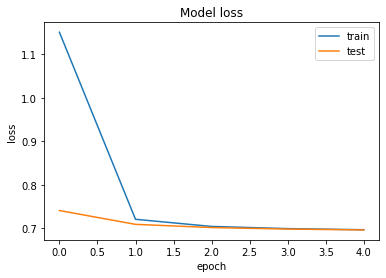

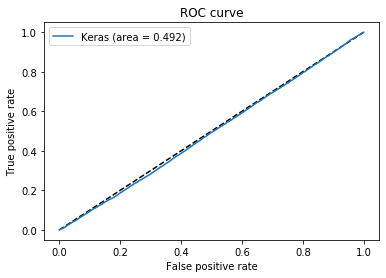

DN- 3  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 3s 19us/sample - loss: 1.2004 - mean_squared_error: 0.4913 - val_loss: 0.7306 - val_mean_squared_error: 0.5301
Epoch 2/5
175999/175999 [==============================] - 3s 16us/sample - loss: 0.7153 - mean_squared_error: 0.5954 - val_loss: 0.7107 - val_mean_squared_error: 0.6136
Epoch 3/5
175999/175999 [==============================] - 2s 12us/sample - loss: 0.7086 - mean_squared_error: 0.6232 - val_loss: 0.7061 - val_mean_squared_error: 0.6337
Epoch 4/5
175999/175999 [==============================] - 3s 15us/sample - loss: 0.7051 - mean_squared_error: 0.6406 - val_loss: 0.7034 - val_mean_squared_error: 0.6485
Epoch 5/5
175999/175999 [==============================] - 2s 14us/sample - loss: 0.7028 - mean_squared_error: 0.6536 - val_loss: 0.7016 - val_mean_squared_error: 0.6600
Model: "sequential_22"
______________________________________________________________

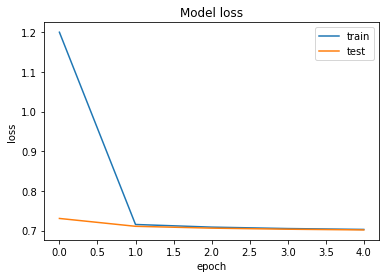

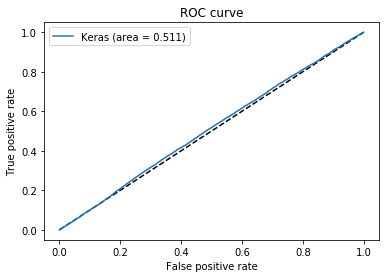

DN- 3  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 6s 37us/sample - loss: 1.3891 - mean_squared_error: 1.8544 - val_loss: 1.1003 - val_mean_squared_error: 1.9972
Epoch 2/5
175999/175999 [==============================] - 5s 29us/sample - loss: 1.0993 - mean_squared_error: 1.9967 - val_loss: 1.0996 - val_mean_squared_error: 2.0089
Epoch 3/5
175999/175999 [==============================] - 4s 21us/sample - loss: 1.0991 - mean_squared_error: 2.0128 - val_loss: 1.0992 - val_mean_squared_error: 2.0150
Epoch 4/5
175999/175999 [==============================] - 5s 26us/sample - loss: 1.0991 - mean_squared_error: 2.0136 - val_loss: 1.0992 - val_mean_squared_error: 2.0155
Epoch 5/5
175999/175999 [==============================] - 4s 24us/sample - loss: 1.0991 - mean_squared_error: 2.0142 - val_loss: 1.0992 - val_mean_squared_error: 2.0161
Model: "sequential_23"
______________________________________________________________

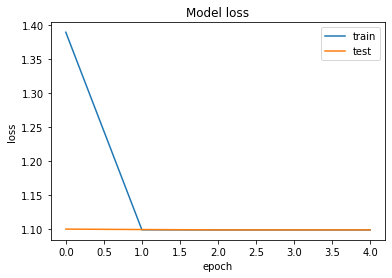

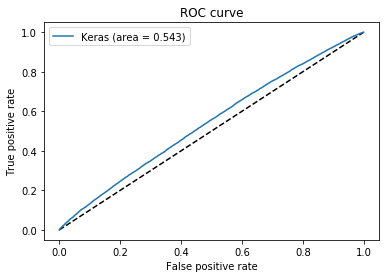

DN- 3  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 5s 27us/sample - loss: 1.4906 - mean_squared_error: 0.6089 - val_loss: 0.7155 - val_mean_squared_error: 0.6409
Epoch 2/5
175999/175999 [==============================] - 3s 20us/sample - loss: 0.7103 - mean_squared_error: 0.6540 - val_loss: 0.7087 - val_mean_squared_error: 0.6668
Epoch 3/5
175999/175999 [==============================] - 4s 21us/sample - loss: 0.7060 - mean_squared_error: 0.6750 - val_loss: 0.7057 - val_mean_squared_error: 0.6838
Epoch 4/5
175999/175999 [==============================] - 4s 22us/sample - loss: 0.7038 - mean_squared_error: 0.6895 - val_loss: 0.7038 - val_mean_squared_error: 0.6962
Epoch 5/5
175999/175999 [==============================] - 4s 21us/sample - loss: 0.7025 - mean_squared_error: 0.7003 - val_loss: 0.7027 - val_mean_squared_error: 0.7057
Model: "sequential_24"
______________________________________________________________

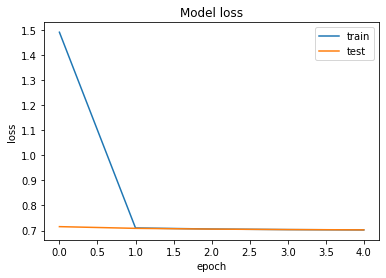

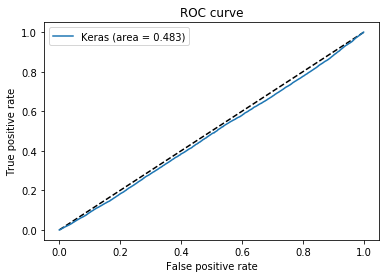

DN- 3  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 8s 45us/sample - loss: 1.4432 - mean_squared_error: 1.5934 - val_loss: 1.1053 - val_mean_squared_error: 1.7334
Epoch 2/5
175999/175999 [==============================] - 7s 38us/sample - loss: 1.1025 - mean_squared_error: 1.7453 - val_loss: 1.1029 - val_mean_squared_error: 1.7575
Epoch 3/5
175999/175999 [==============================] - 7s 38us/sample - loss: 1.1002 - mean_squared_error: 1.7893 - val_loss: 1.1009 - val_mean_squared_error: 1.8048
Epoch 4/5
175999/175999 [==============================] - 7s 37us/sample - loss: 1.0995 - mean_squared_error: 1.8094 - val_loss: 1.0991 - val_mean_squared_error: 1.8237
Epoch 5/5
175999/175999 [==============================] - 7s 37us/sample - loss: 1.0990 - mean_squared_error: 1.8312 - val_loss: 1.0989 - val_mean_squared_error: 1.8348
Model: "sequential_25"
______________________________________________________________

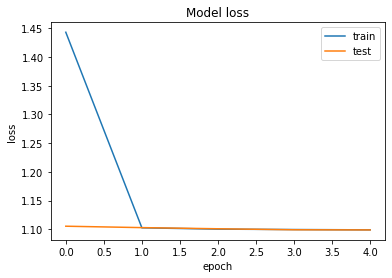

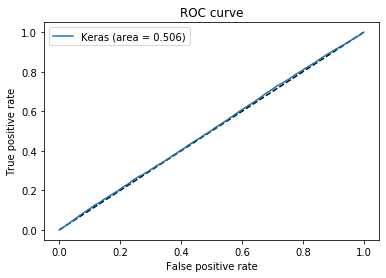

DN- 3  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 11s 64us/sample - loss: 1.1469 - mean_squared_error: 0.5874 - val_loss: 0.7401 - val_mean_squared_error: 0.6214
Epoch 2/5
175999/175999 [==============================] - 9s 51us/sample - loss: 0.7282 - mean_squared_error: 0.6427 - val_loss: 0.7196 - val_mean_squared_error: 0.6610
Epoch 3/5
175999/175999 [==============================] - 7s 42us/sample - loss: 0.7139 - mean_squared_error: 0.6725 - val_loss: 0.7108 - val_mean_squared_error: 0.6832
Epoch 4/5
175999/175999 [==============================] - 8s 45us/sample - loss: 0.7093 - mean_squared_error: 0.6905 - val_loss: 0.7068 - val_mean_squared_error: 0.6977
Epoch 5/5
175999/175999 [==============================] - 8s 45us/sample - loss: 0.7068 - mean_squared_error: 0.7028 - val_loss: 0.7057 - val_mean_squared_error: 0.7083
Model: "sequential_26"
_____________________________________________________________

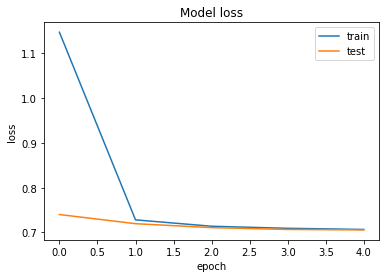

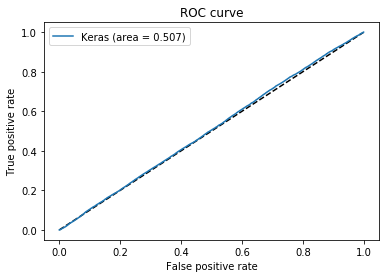

DN- 3  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 18s 102us/sample - loss: 1.5201 - mean_squared_error: 0.5933 - val_loss: 0.7002 - val_mean_squared_error: 0.6524
Epoch 2/5
175999/175999 [==============================] - 17s 97us/sample - loss: 0.6991 - mean_squared_error: 0.6731 - val_loss: 0.6984 - val_mean_squared_error: 0.6895
Epoch 3/5
175999/175999 [==============================] - 18s 100us/sample - loss: 0.6979 - mean_squared_error: 0.6990 - val_loss: 0.6976 - val_mean_squared_error: 0.7081
Epoch 4/5
175999/175999 [==============================] - 15s 86us/sample - loss: 0.6973 - mean_squared_error: 0.7136 - val_loss: 0.6971 - val_mean_squared_error: 0.7198
Epoch 5/5
175999/175999 [==============================] - 16s 91us/sample - loss: 0.6968 - mean_squared_error: 0.7238 - val_loss: 0.6967 - val_mean_squared_error: 0.7284
Model: "sequential_27"
_______________________________________________________

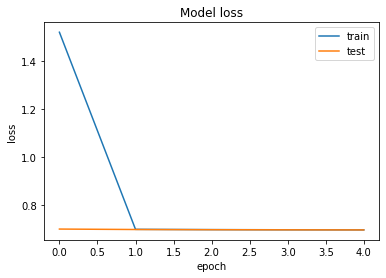

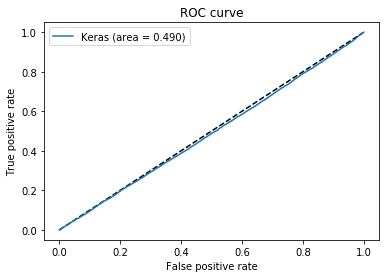

DN- 3  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 19s 107us/sample - loss: 1.3166 - mean_squared_error: 0.9884 - val_loss: 0.7127 - val_mean_squared_error: 1.0127
Epoch 2/5
175999/175999 [==============================] - 14s 82us/sample - loss: 0.7097 - mean_squared_error: 1.0150 - val_loss: 0.7074 - val_mean_squared_error: 1.0173
Epoch 3/5
175999/175999 [==============================] - 17s 99us/sample - loss: 0.7063 - mean_squared_error: 1.0188 - val_loss: 0.7054 - val_mean_squared_error: 1.0205
Epoch 4/5
175999/175999 [==============================] - 16s 92us/sample - loss: 0.7049 - mean_squared_error: 1.0212 - val_loss: 0.7042 - val_mean_squared_error: 1.0224
Epoch 5/5
175999/175999 [==============================] - 14s 80us/sample - loss: 0.7037 - mean_squared_error: 1.0229 - val_loss: 0.7034 - val_mean_squared_error: 1.0239
Model: "sequential_28"
________________________________________________________

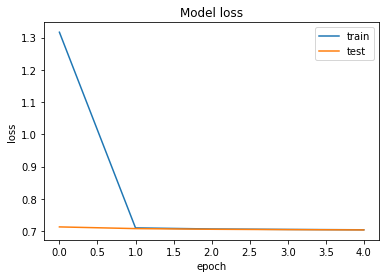

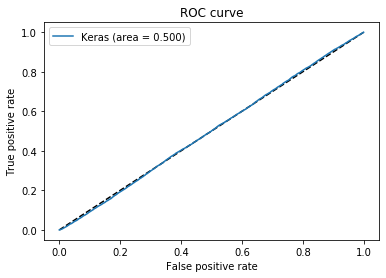

DN- 5  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 5s 27us/sample - loss: 1.4123 - mean_squared_error: 1.4655 - val_loss: 1.1062 - val_mean_squared_error: 1.5957
Epoch 2/5
175999/175999 [==============================] - 3s 17us/sample - loss: 1.1025 - mean_squared_error: 1.6377 - val_loss: 1.1011 - val_mean_squared_error: 1.6519
Epoch 3/5
175999/175999 [==============================] - 3s 17us/sample - loss: 1.1009 - mean_squared_error: 1.6596 - val_loss: 1.1006 - val_mean_squared_error: 1.6684
Epoch 4/5
175999/175999 [==============================] - 3s 17us/sample - loss: 1.0999 - mean_squared_error: 1.6779 - val_loss: 1.1001 - val_mean_squared_error: 1.6818
Epoch 5/5
175999/175999 [==============================] - 3s 17us/sample - loss: 1.0996 - mean_squared_error: 1.6819 - val_loss: 1.1001 - val_mean_squared_error: 1.6836
Model: "sequential_29"
______________________________________________________________

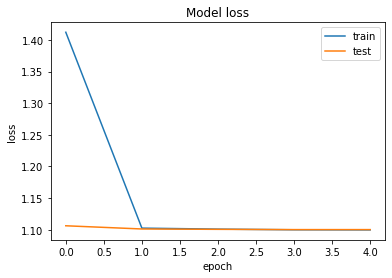

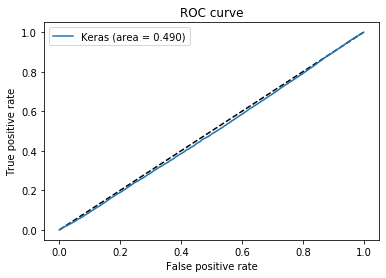

DN- 5  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 5s 26us/sample - loss: 1.8786 - mean_squared_error: 1.4254 - val_loss: 1.1141 - val_mean_squared_error: 1.6506
Epoch 2/5
175999/175999 [==============================] - 3s 18us/sample - loss: 1.1100 - mean_squared_error: 1.7049 - val_loss: 1.1069 - val_mean_squared_error: 1.7492
Epoch 3/5
175999/175999 [==============================] - 3s 18us/sample - loss: 1.1065 - mean_squared_error: 1.7565 - val_loss: 1.1057 - val_mean_squared_error: 1.7619
Epoch 4/5
175999/175999 [==============================] - 3s 18us/sample - loss: 1.1053 - mean_squared_error: 1.7715 - val_loss: 1.1051 - val_mean_squared_error: 1.7784
Epoch 5/5
175999/175999 [==============================] - 3s 18us/sample - loss: 1.1043 - mean_squared_error: 1.7819 - val_loss: 1.1044 - val_mean_squared_error: 1.7833
Model: "sequential_30"
______________________________________________________________

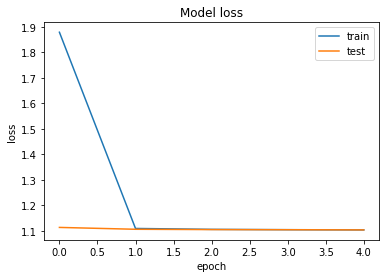

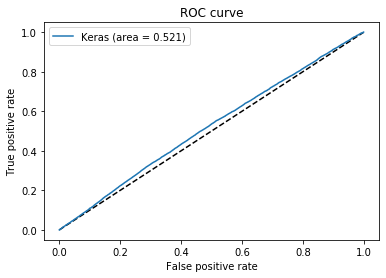

DN- 5  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 7s 42us/sample - loss: 1.3416 - mean_squared_error: 2.0569 - val_loss: 1.1066 - val_mean_squared_error: 2.1583
Epoch 2/5
175999/175999 [==============================] - 6s 33us/sample - loss: 1.1060 - mean_squared_error: 2.1594 - val_loss: 1.1047 - val_mean_squared_error: 2.1645
Epoch 3/5
175999/175999 [==============================] - 6s 32us/sample - loss: 1.1038 - mean_squared_error: 2.1646 - val_loss: 1.1045 - val_mean_squared_error: 2.1668
Epoch 4/5
175999/175999 [==============================] - 6s 34us/sample - loss: 1.1035 - mean_squared_error: 2.1667 - val_loss: 1.1040 - val_mean_squared_error: 2.1692
Epoch 5/5
175999/175999 [==============================] - 6s 33us/sample - loss: 1.1022 - mean_squared_error: 2.1703 - val_loss: 1.1025 - val_mean_squared_error: 2.1719
Model: "sequential_31"
______________________________________________________________

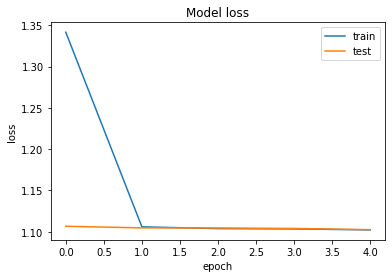

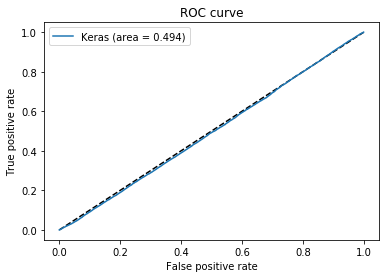

DN- 5  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 7s 41us/sample - loss: 1.1453 - mean_squared_error: 0.6363 - val_loss: 0.7083 - val_mean_squared_error: 0.6831
Epoch 2/5
175999/175999 [==============================] - 6s 34us/sample - loss: 0.7063 - mean_squared_error: 0.6959 - val_loss: 0.7043 - val_mean_squared_error: 0.7098
Epoch 3/5
175999/175999 [==============================] - 6s 33us/sample - loss: 0.7039 - mean_squared_error: 0.7177 - val_loss: 0.7029 - val_mean_squared_error: 0.7277
Epoch 4/5
175999/175999 [==============================] - 6s 33us/sample - loss: 0.7028 - mean_squared_error: 0.7333 - val_loss: 0.7019 - val_mean_squared_error: 0.7412
Epoch 5/5
175999/175999 [==============================] - 6s 33us/sample - loss: 0.7019 - mean_squared_error: 0.7454 - val_loss: 0.7013 - val_mean_squared_error: 0.7521
Model: "sequential_32"
______________________________________________________________

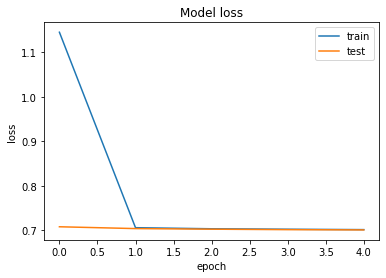

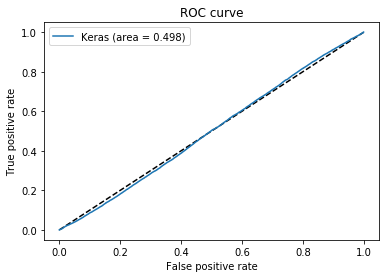

DN- 5  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 13s 73us/sample - loss: 1.5712 - mean_squared_error: 1.7404 - val_loss: 1.1009 - val_mean_squared_error: 1.9382
Epoch 2/5
175999/175999 [==============================] - 11s 65us/sample - loss: 1.0997 - mean_squared_error: 1.9421 - val_loss: 1.1002 - val_mean_squared_error: 1.9489
Epoch 3/5
175999/175999 [==============================] - 12s 66us/sample - loss: 1.0995 - mean_squared_error: 1.9489 - val_loss: 1.1001 - val_mean_squared_error: 1.9522
Epoch 4/5
175999/175999 [==============================] - 13s 72us/sample - loss: 1.0994 - mean_squared_error: 1.9547 - val_loss: 1.0997 - val_mean_squared_error: 1.9580
Epoch 5/5
175999/175999 [==============================] - 12s 67us/sample - loss: 1.0993 - mean_squared_error: 1.9573 - val_loss: 1.0996 - val_mean_squared_error: 1.9586
Model: "sequential_33"
_________________________________________________________

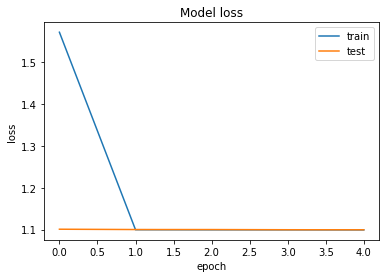

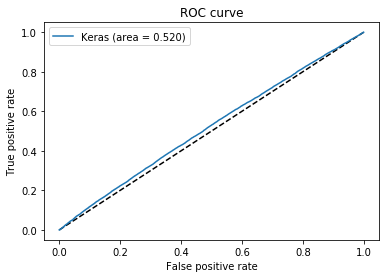

DN- 5  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 16s 91us/sample - loss: 0.8593 - mean_squared_error: 0.6354 - val_loss: 0.7059 - val_mean_squared_error: 0.6542
Epoch 2/5
175999/175999 [==============================] - 12s 68us/sample - loss: 0.7056 - mean_squared_error: 0.6594 - val_loss: 0.7054 - val_mean_squared_error: 0.6648
Epoch 3/5
175999/175999 [==============================] - 12s 69us/sample - loss: 0.7053 - mean_squared_error: 0.6683 - val_loss: 0.7052 - val_mean_squared_error: 0.6725
Epoch 4/5
175999/175999 [==============================] - 13s 71us/sample - loss: 0.7051 - mean_squared_error: 0.6752 - val_loss: 0.7050 - val_mean_squared_error: 0.67850 - mean_squared_error: 0.67 - ETA: 1s
Epoch 5/5
175999/175999 [==============================] - 14s 77us/sample - loss: 0.7049 - mean_squared_error: 0.6806 - val_loss: 0.7048 - val_mean_squared_error: 0.6833
Model: "sequential_34"
___________________

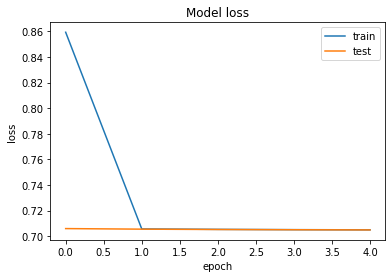

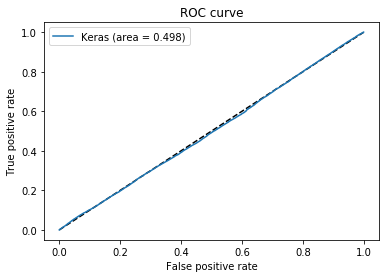

DN- 5  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 26s 150us/sample - loss: 0.9047 - mean_squared_error: 0.6964 - val_loss: 0.6975 - val_mean_squared_error: 0.7201
Epoch 2/5
175999/175999 [==============================] - 25s 144us/sample - loss: 0.6970 - mean_squared_error: 0.7244 - val_loss: 0.6970 - val_mean_squared_error: 0.7285
Epoch 3/5
175999/175999 [==============================] - 27s 152us/sample - loss: 0.6966 - mean_squared_error: 0.7316 - val_loss: 0.6966 - val_mean_squared_error: 0.7349
Epoch 4/5
175999/175999 [==============================] - 30s 171us/sample - loss: 0.6962 - mean_squared_error: 0.7376 - val_loss: 0.6962 - val_mean_squared_error: 0.7403ss: 0.696
Epoch 5/5
175999/175999 [==============================] - 28s 160us/sample - loss: 0.6959 - mean_squared_error: 0.7425 - val_loss: 0.6960 - val_mean_squared_error: 0.7449
Model: "sequential_35"
___________________________________________

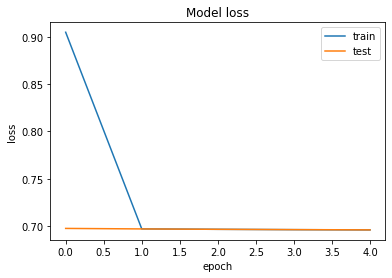

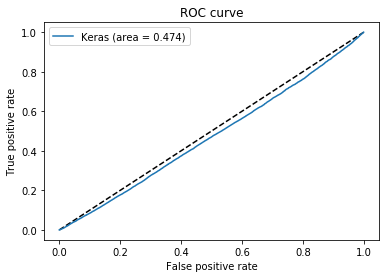

DN- 5  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 25s 141us/sample - loss: 1.3752 - mean_squared_error: 1.9372 - val_loss: 1.1191 - val_mean_squared_error: 2.0520
Epoch 2/5
175999/175999 [==============================] - 23s 132us/sample - loss: 1.1196 - mean_squared_error: 2.0516 - val_loss: 1.1191 - val_mean_squared_error: 2.0542
Epoch 3/5
175999/175999 [==============================] - 26s 148us/sample - loss: 1.1196 - mean_squared_error: 2.0545 - val_loss: 1.1191 - val_mean_squared_error: 2.0570
Epoch 4/5
175999/175999 [==============================] - 28s 158us/sample - loss: 1.1195 - mean_squared_error: 2.0572 - val_loss: 1.1191 - val_mean_squared_error: 2.0603
Epoch 5/5
175999/175999 [==============================] - 35s 200us/sample - loss: 1.1194 - mean_squared_error: 2.0595 - val_loss: 1.1191 - val_mean_squared_error: 2.0613
Model: "sequential_36"
____________________________________________________

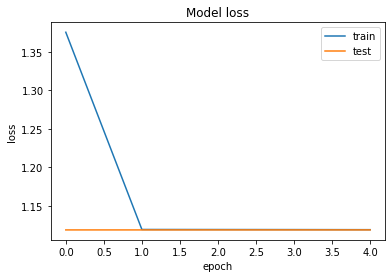

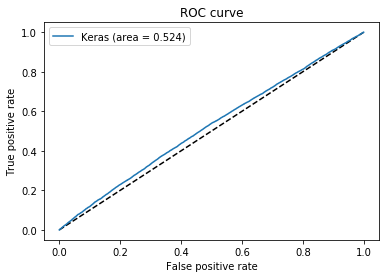

DN- 7  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 7s 40us/sample - loss: 1.6090 - mean_squared_error: 0.5025 - val_loss: 0.7260 - val_mean_squared_error: 0.5250
Epoch 2/5
175999/175999 [==============================] - 4s 26us/sample - loss: 0.7162 - mean_squared_error: 0.5630 - val_loss: 0.7069 - val_mean_squared_error: 0.5891
Epoch 3/5
175999/175999 [==============================] - 5s 30us/sample - loss: 0.7040 - mean_squared_error: 0.6081 - val_loss: 0.6996 - val_mean_squared_error: 0.6211
Epoch 4/5
175999/175999 [==============================] - 5s 31us/sample - loss: 0.6993 - mean_squared_error: 0.6334 - val_loss: 0.6964 - val_mean_squared_error: 0.6412
Epoch 5/5
175999/175999 [==============================] - 4s 22us/sample - loss: 0.6965 - mean_squared_error: 0.6499 - val_loss: 0.6944 - val_mean_squared_error: 0.6551
Model: "sequential_37"
______________________________________________________________

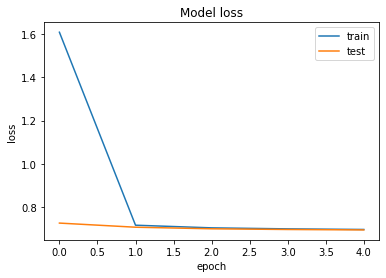

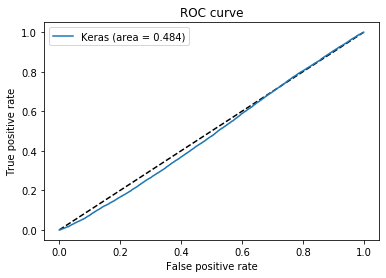

DN- 7  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 6s 35us/sample - loss: 2.0184 - mean_squared_error: 1.4239 - val_loss: 1.1471 - val_mean_squared_error: 1.8670
Epoch 2/5
175999/175999 [==============================] - 4s 25us/sample - loss: 1.1291 - mean_squared_error: 1.8840 - val_loss: 1.1226 - val_mean_squared_error: 1.8966
Epoch 3/5
175999/175999 [==============================] - 5s 28us/sample - loss: 1.1166 - mean_squared_error: 1.9105 - val_loss: 1.1145 - val_mean_squared_error: 1.9221
Epoch 4/5
175999/175999 [==============================] - 5s 31us/sample - loss: 1.1123 - mean_squared_error: 1.9256 - val_loss: 1.1122 - val_mean_squared_error: 1.9345
Epoch 5/5
175999/175999 [==============================] - 5s 29us/sample - loss: 1.1111 - mean_squared_error: 1.9394 - val_loss: 1.1115 - val_mean_squared_error: 1.9479
Model: "sequential_38"
______________________________________________________________

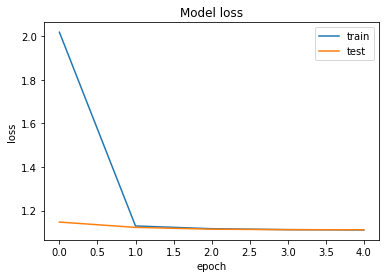

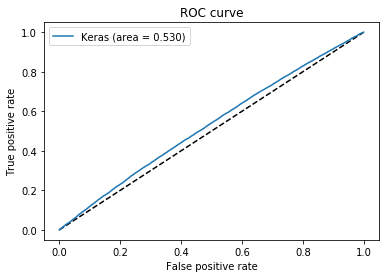

DN- 7  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 10s 56us/sample - loss: 0.8591 - mean_squared_error: 0.5927 - val_loss: 0.6967 - val_mean_squared_error: 0.6108
Epoch 2/5
175999/175999 [==============================] - 8s 44us/sample - loss: 0.6957 - mean_squared_error: 0.6229 - val_loss: 0.6950 - val_mean_squared_error: 0.6326
Epoch 3/5
175999/175999 [==============================] - 7s 42us/sample - loss: 0.6943 - mean_squared_error: 0.6402 - val_loss: 0.6940 - val_mean_squared_error: 0.6463
Epoch 4/5
175999/175999 [==============================] - 7s 42us/sample - loss: 0.6935 - mean_squared_error: 0.6517 - val_loss: 0.6934 - val_mean_squared_error: 0.6560
Epoch 5/5
175999/175999 [==============================] - 9s 51us/sample - loss: 0.6929 - mean_squared_error: 0.6600 - val_loss: 0.6929 - val_mean_squared_error: 0.6634
Model: "sequential_39"
_____________________________________________________________

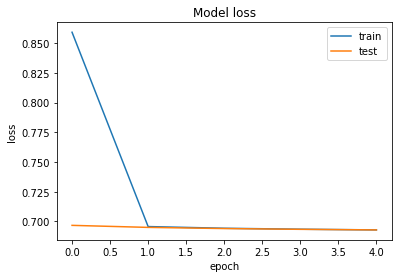

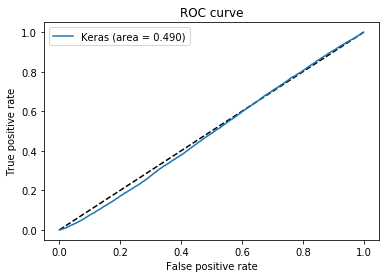

DN- 7  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 10s 60us/sample - loss: 1.3242 - mean_squared_error: 1.5467 - val_loss: 1.1138 - val_mean_squared_error: 1.6443
Epoch 2/5
175999/175999 [==============================] - 9s 51us/sample - loss: 1.1130 - mean_squared_error: 1.6479 - val_loss: 1.1135 - val_mean_squared_error: 1.6566
Epoch 3/5
175999/175999 [==============================] - 9s 53us/sample - loss: 1.1123 - mean_squared_error: 1.6625 - val_loss: 1.1134 - val_mean_squared_error: 1.6678
Epoch 4/5
175999/175999 [==============================] - 8s 47us/sample - loss: 1.1121 - mean_squared_error: 1.6711 - val_loss: 1.1125 - val_mean_squared_error: 1.6765
Epoch 5/5
175999/175999 [==============================] - 8s 46us/sample - loss: 1.1119 - mean_squared_error: 1.6810 - val_loss: 1.1122 - val_mean_squared_error: 1.6853
Model: "sequential_40"
_____________________________________________________________

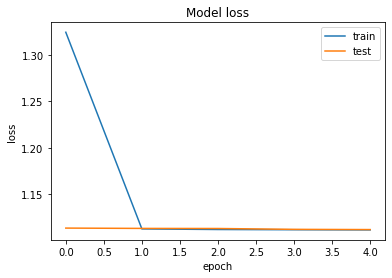

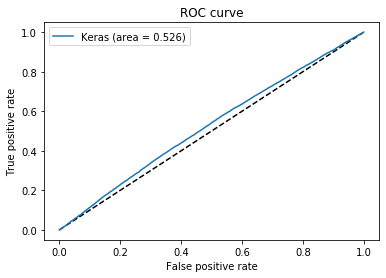

DN- 7  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 18s 100us/sample - loss: 1.3133 - mean_squared_error: 2.1634 - val_loss: 1.1016 - val_mean_squared_error: 2.2883
Epoch 2/5
175999/175999 [==============================] - 15s 84us/sample - loss: 1.1020 - mean_squared_error: 2.2884 - val_loss: 1.1006 - val_mean_squared_error: 2.2915
Epoch 3/5
175999/175999 [==============================] - 15s 84us/sample - loss: 1.1012 - mean_squared_error: 2.2905 - val_loss: 1.1004 - val_mean_squared_error: 2.2927
Epoch 4/5
175999/175999 [==============================] - 15s 84us/sample - loss: 1.1010 - mean_squared_error: 2.2914 - val_loss: 1.1003 - val_mean_squared_error: 2.2935
Epoch 5/5
175999/175999 [==============================] - 16s 93us/sample - loss: 1.1009 - mean_squared_error: 2.2925 - val_loss: 1.1000 - val_mean_squared_error: 2.2948
Model: "sequential_41"
________________________________________________________

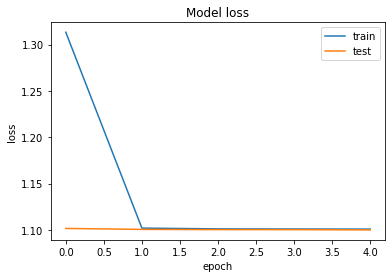

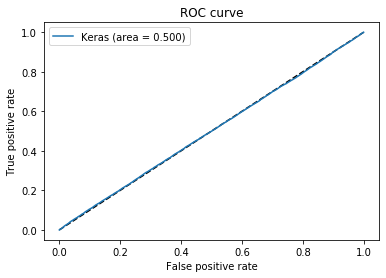

DN- 7  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 18s 105us/sample - loss: 1.0483 - mean_squared_error: 0.6175 - val_loss: 0.7173 - val_mean_squared_error: 0.6472
Epoch 2/5
175999/175999 [==============================] - 19s 111us/sample - loss: 0.7171 - mean_squared_error: 0.6554 - val_loss: 0.7162 - val_mean_squared_error: 0.6626
Epoch 3/5
175999/175999 [==============================] - 21s 119us/sample - loss: 0.7163 - mean_squared_error: 0.6677 - val_loss: 0.7157 - val_mean_squared_error: 0.6729
Epoch 4/5
175999/175999 [==============================] - 18s 101us/sample - loss: 0.7150 - mean_squared_error: 0.7143 - val_loss: 0.7146 - val_mean_squared_error: 0.7435
Epoch 5/5
175999/175999 [==============================] - 15s 88us/sample - loss: 0.7144 - mean_squared_error: 0.7441 - val_loss: 0.7144 - val_mean_squared_error: 0.7455
Model: "sequential_42"
_____________________________________________________

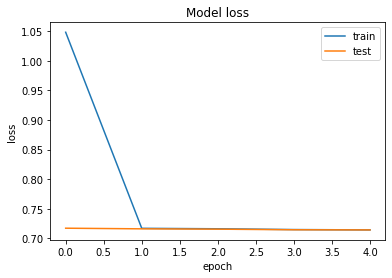

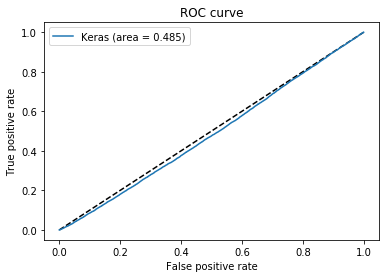

DN- 7  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 37s 209us/sample - loss: 0.8259 - mean_squared_error: 0.5138 - val_loss: 0.6908 - val_mean_squared_error: 0.5473
Epoch 2/5
175999/175999 [==============================] - 35s 197us/sample - loss: 0.6909 - mean_squared_error: 0.5550 - val_loss: 0.6898 - val_mean_squared_error: 0.5623
Epoch 3/5
175999/175999 [==============================] - 37s 208us/sample - loss: 0.6901 - mean_squared_error: 0.5656 - val_loss: 0.6893 - val_mean_squared_error: 0.5698
Epoch 4/5
175999/175999 [==============================] - 33s 188us/sample - loss: 0.6896 - mean_squared_error: 0.5714 - val_loss: 0.6888 - val_mean_squared_error: 0.5740
Epoch 5/5
175999/175999 [==============================] - 32s 185us/sample - loss: 0.6891 - mean_squared_error: 0.5749 - val_loss: 0.6884 - val_mean_squared_error: 0.5770
Model: "sequential_43"
____________________________________________________

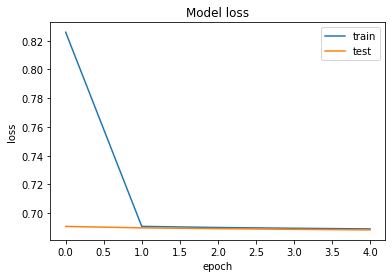

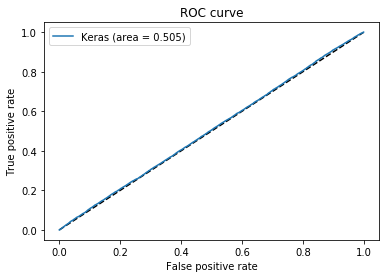

DN- 7  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 37s 209us/sample - loss: 0.7969 - mean_squared_error: 0.5861 - val_loss: 0.7257 - val_mean_squared_error: 0.6335
Epoch 2/5
175999/175999 [==============================] - 33s 188us/sample - loss: 0.7240 - mean_squared_error: 0.6482 - val_loss: 0.7232 - val_mean_squared_error: 0.6616
Epoch 3/5
175999/175999 [==============================] - 33s 190us/sample - loss: 0.7225 - mean_squared_error: 0.6685 - val_loss: 0.7222 - val_mean_squared_error: 0.6766
Epoch 4/5
175999/175999 [==============================] - 34s 192us/sample - loss: 0.7217 - mean_squared_error: 0.6807 - val_loss: 0.7216 - val_mean_squared_error: 0.6868
Epoch 5/5
175999/175999 [==============================] - 35s 200us/sample - loss: 0.7212 - mean_squared_error: 0.6895 - val_loss: 0.7212 - val_mean_squared_error: 0.6941
Model: "sequential_44"
____________________________________________________

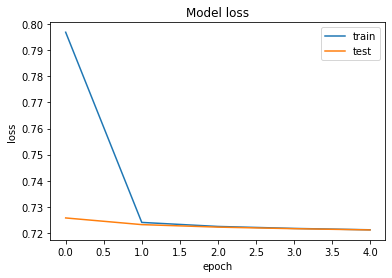

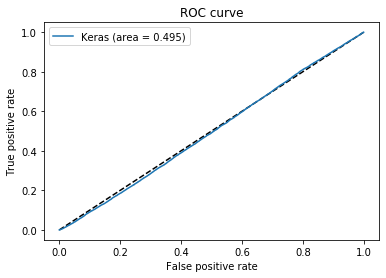

Wall time: 29min 6s


In [38]:
# use 0.2 million data, 10% of data as in the paper. so they got 0.8 auc, we only get 0.52 at five layer here.
# try with larger dataset?

%%time
layer_list = [3,5,7]
units_list = [100, 200, 300, 500]
init_learning_rate_list= [2e-5] #you can add more lr options when run on GPU
weight_decay_list=[0,0.00001]

auc_deep = pd.DataFrame(columns=["layer","auc"])
i = 0

for layer in layer_list:
    for units in units_list:
        for learning_rate in init_learning_rate_list:
            for weight_decay in weight_decay_list:
                print("DN-",layer," layers")  #better print out all parameters used for make pick out best model easy!!!!!!!!!!!!!
                auc_score= tensorflow_keras_model(X_train,y_train,X_test,y_test,Num_layers=layer, units=units,learning_rate=learning_rate,weight_decay=weight_decay)
                auc_deep.loc[i]=[layer,auc_score]
                i+=1

Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 15s 84us/sample - loss: 1.1483 - mean_squared_error: 2.5704 - val_loss: 1.1239 - val_mean_squared_error: 2.5843
Epoch 2/5
175999/175999 [==============================] - 12s 66us/sample - loss: 1.1239 - mean_squared_error: 2.5840 - val_loss: 1.1238 - val_mean_squared_error: 2.5843
Epoch 3/5
175999/175999 [==============================] - 13s 71us/sample - loss: 1.1238 - mean_squared_error: 2.5840 - val_loss: 1.1237 - val_mean_squared_error: 2.5843
Epoch 4/5
175999/175999 [==============================] - 13s 72us/sample - loss: 1.1237 - mean_squared_error: 2.5840 - val_loss: 1.1236 - val_mean_squared_error: 2.5843
Epoch 5/5
175999/175999 [==============================] - 13s 77us/sample - loss: 1.1236 - mean_squared_error: 2.5840 - val_loss: 1.1235 - val_mean_squared_error: 2.5843
Model: "sequential_45"
_________________________________________________________________
Layer

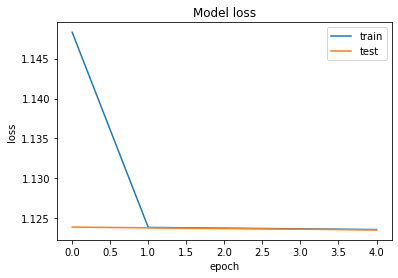

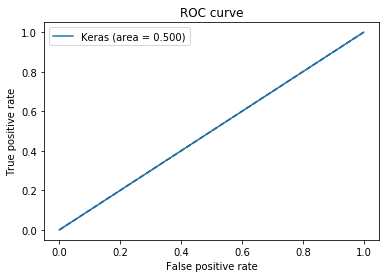

In [39]:
# from the output above we can see five layer, weight_decay=1e-5 is indeed optimized parameters even from this subset of data.

# parameter combination in the paper give 
# 0.5 AUC

# the below parameter combination of give 0.526 AUC

# layer_list = [5]
# units_list = [ 500]
# init_learning_rate_list= [2e-5] #you can add more lr options when run on GPU
# weight_decay_list=[0.00001]


# the below parameter combination of give 0.543 AUC

# layer_list = [3]
# units_list = [300]
# init_learning_rate_list= [2e-5] #you can add more lr options when run on GPU
# weight_decay_list=[0]

# 7 layer model has one auc 0.53

# the model below is using the NN achi in paper on page 6
tensorflow_keras_model(X_train,y_train,X_test,y_test,Num_layers=5, units=300,learning_rate=0.05,weight_decay=1e-5)

In [40]:
#try keras

# or nested for loop to also test activate?

import keras
from keras.models import Sequential

bestResult = {}
bestScore = -1

node = 100
activate = 'relu'
optimize = 'Adam'
batchSize = [500, 1000, 10000, 100000]


for size in batchSize:
    with tf.device("/cpu:0"):
        model = Sequential()
        model.add(Dense(node, input_dim=x.shape[1], kernel_initializer='uniform'))
        model.add(Dense(node, activation=activate))
        model.add(Dense(node, activation=activate))
        model.add(Dense(1))

        model = multi_gpu_model(model, gpus=2)
        model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=optimize)

        history = model.fit(x, y, epochs=5, batch_size=size, validation_split=.1)
        
        plotMetric(history)

        score = roc_auc_score(y_test,model.predict(x_test))

        print(f"Nodes: {node}")
        print(f"Activation: {activate}")
        print(f"Score: {score}")

        if score > bestScore:
            bestResult['Node'] = node
            bestResult['Activation'] = activate
            bestResult['Optimization'] = optimize
            bestResult['Batch'] = size
            bestResult['Score'] = score

            bestScore = score

print(f"{bestResult}\n")

Using TensorFlow backend.


AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [41]:
#add dropout
bestResult = {}
bestScore = -1

nodes = [10, 20, 50, 100]
activation = ['relu', 'sigmoid', 'tanh', 'elu', 'selu']

for activate in activation:
    for node in nodes:
        with tf.device("/cpu:0"):
            model = Sequential()
            model.add(Dense(node, input_dim=x.shape[1], kernel_initializer='uniform'))
            model.add(Dense(node, activation=activate))
            model.add(Dropout(0.10))
            model.add(Dense(node, activation=activate))
            model.add(Dense(1))
            
            model = multi_gpu_model(model, gpus=2)
            model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')

            history = model.fit(x, y, epochs=5, batch_size=1000, validation_split=.1)

            plotMetric(history)

            score = roc_auc_score(y_test,model.predict(x_test))

            print(f"Nodes: {node}")
            print(f"Activation: {activate}")
            print(f"Score: {score}")

            if score > bestScore:
                bestResult['Node'] = node
                bestResult['Activation'] = activate
                bestResult['Score'] = score

                bestScore = score

print(f"{bestResult}\n")

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [ ]:
#             model = Sequential()
#             model.add(Dense(node, input_dim=x.shape[1], kernel_initializer='uniform'))
#             model.add(Dense(node, activation=activate))
#             model.add(Dropout(0.10))
#             model.add(Dense(node, activation=activate))
#             model.add(Dropout(0.10))
#             model.add(Dense(node, activation=activate))
#             model.add(Dense(1))